In [10]:
!pip install quandl

In [11]:
!pip install -U pandas-datareader

In [6]:
!pip install plotly

     |████████████████████████████████| 20.6 MB 4.6 MB/s eta 0:00:01


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go
import quandl
import sys

%matplotlib inline

In [2]:
quandl.ApiConfig.api_key = "zeFFZKHQFexJpyXo1TMR"

In [3]:
df_selic = quandl.get("BCB/432", trim_start="2009-01-01")
df_selic.head()

,Value
Date,
2009-01-01,13.75
2009-01-02,13.75
2009-01-03,13.75
2009-01-04,13.75
2009-01-05,13.75


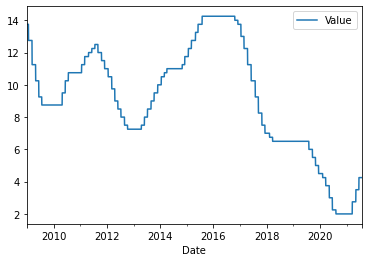

In [4]:
df_selic.plot()
plt.show()

In [5]:
df_ibov = quandl.get("BCB/7845", trim_start="2009-01-01")
df_ibov.head()

,Value
Date,
2009-01-31,39300.0
2009-02-28,38183.0
2009-03-31,40926.0
2009-04-30,47289.0
2009-05-31,53197.0


<AxesSubplot:xlabel='Date'>

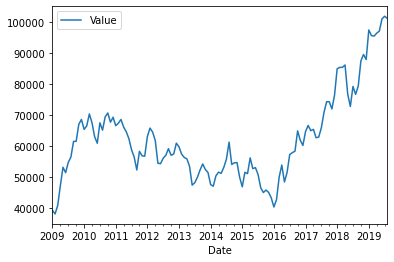

In [6]:
df_ibov.plot()

In [7]:
df_IPCA = quandl.get("BCB/13522", trim_start="2009-01-01")
df_IPCA.head()

,Value
Date,
2009-01-31,5.84
2009-02-28,5.90
2009-03-31,5.61
2009-04-30,5.53
2009-05-31,5.20


<AxesSubplot:xlabel='Date'>

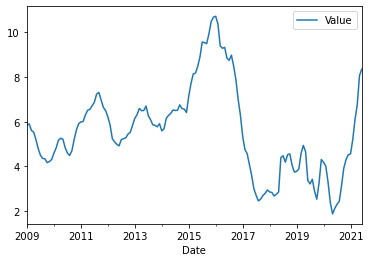

In [8]:
df_IPCA.plot()


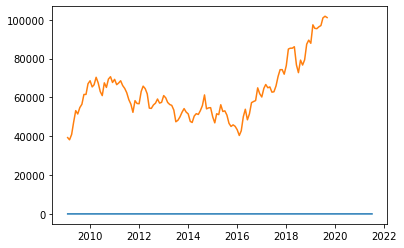

In [9]:
plt.plot(df_IPCA)
plt.plot(df_ibov)

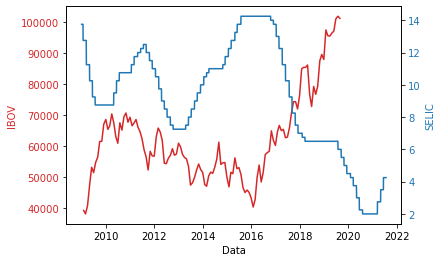

In [10]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Data')
ax1.set_ylabel('IBOV', color=color)
ax1.plot(df_ibov, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() # Configurar um outro eixo vertical que compartilha o mesmo eixo X
color = 'tab:blue'
ax2.set_ylabel('SELIC', color=color)
ax2.plot(df_selic, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.show()

In [11]:
df_ibov_selic = pd.merge(df_ibov, df_selic, on="Date")
df_ibov_selic.columns = ["IBOV", "SELIC"]
df_ibov_selic.head()

,IBOV,SELIC
Date,,
2009-01-31,39300.0,12.75
2009-02-28,38183.0,12.75
2009-03-31,40926.0,11.25
2009-04-30,47289.0,10.25
2009-05-31,53197.0,10.25


In [12]:
df_ibov_selic_ipca = pd.merge(df_ibov_selic, df_IPCA, on="Date")
df_ibov_selic_ipca.columns = ["IBOV", "SELIC", "IPCA"]
df_ibov_selic_ipca.head()

,IBOV,SELIC,IPCA
Date,,,
2009-01-31,39300.0,12.75,5.84
2009-02-28,38183.0,12.75,5.90
2009-03-31,40926.0,11.25,5.61
2009-04-30,47289.0,10.25,5.53
2009-05-31,53197.0,10.25,5.20


In [13]:
df_ibov_selic_ipca.corr()

,IBOV,SELIC,IPCA
IBOV,1.000000,-0.653393,-0.662880
SELIC,-0.653393,1.000000,0.789178
IPCA,-0.662880,0.789178,1.000000


<AxesSubplot:xlabel='IBOV', ylabel='IPCA'>

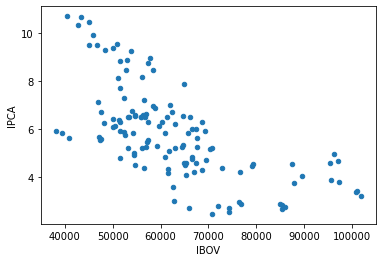

In [15]:
 df_ibov_selic_ipca.plot(kind='scatter', x='IBOV', y='IPCA')

In [25]:
plt.scatter(x=df_ibov_selic_ipca['bovespa'], y=df_ibov_selic_ipca['selic'])

KeyError: 'bovespa'

In [26]:
sns.scatterplot(data=df_ibov_selic_ipca, x='bovespa', y='selic')

ValueError: Could not interpret value `bovespa` for parameter `x`

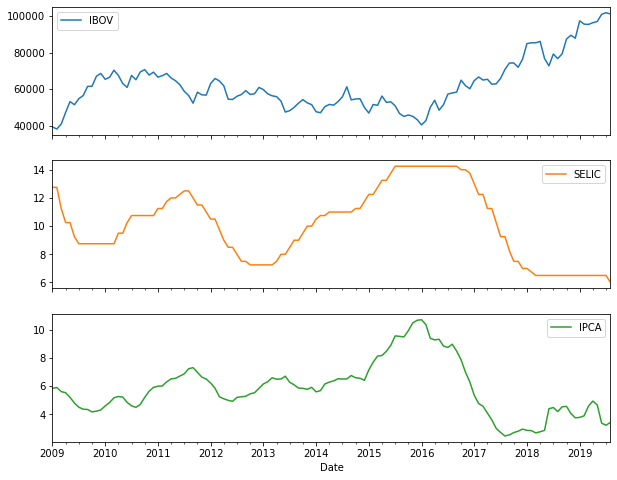

In [22]:
df_ibov_selic_ipca.plot(subplots=True, figsize=(10, 8)) 
plt.show()

In [23]:
 from pandas_datareader.data import DataReader

In [24]:
df_ibov_yahoo = DataReader('^BVSP', data_source='yahoo', start='2010-1-1')
df_ibov_yahoo.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,70081.0,68587.0,68587.0,70045.0,1655400.0,70045.0
2010-01-05,70595.0,69928.0,70046.0,70240.0,1984200.0,70240.0
2010-01-06,70937.0,70016.0,70237.0,70729.0,2243600.0,70729.0
2010-01-07,70723.0,70045.0,70723.0,70451.0,1555000.0,70451.0
2010-01-08,70766.0,70158.0,70455.0,70263.0,1634400.0,70263.0
